In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Questions
1. From which countries has Canada admitted the highest number of refugees?
2. What are the total number of resettled refugees in Canada per year?
3. What are the countries of origin for the majority of asylum claims made in Canada?
4. What is the total number of asylum claims made in Canada every year?
5. What are the general trends in refugee and asylum statistics from 2012-2022?

This data set has two classification of refugees, UNHCR-refugees and Asylum-seekers. 
In this data set, UNHCR-Refugees refers to people who have been resettled to Canada, and arrive to the country as permanent residents. While asylum-seeker refers to someone who has arrived in Canada as a visitor, worker, student, etc., through official or unofficial ports of entry, and who applied for protection from within Canada (after arrival).

In [16]:
data = pd.read_csv('can-stats-2012-22.csv')
data.info

<bound method DataFrame.info of       Year                   Country-of-origin  UNHCR-refugees  \
0     2012                         Afghanistan            2609   
1     2012                             Albania            1764   
2     2012                             Algeria             513   
3     2012                              Angola             753   
4     2012                 Antigua and Barbuda              40   
...    ...                                 ...             ...   
1865  2022  Venezuela (Bolivarian Republic of)            1497   
1866  2022                      Western Sahara               5   
1867  2022                               Yemen             450   
1868  2022                              Zambia              23   
1869  2022                            Zimbabwe             309   

      Asylum-seekers  total-count  
0                411         3020  
1                579         2343  
2                284          797  
3                 21          7

In [12]:
data.head()

,Year,Country-of-origin,UNHCR-refugees,Asylum-seekers,total-count
0,2012,Afghanistan,2609,411,3020
1,2012,Albania,1764,579,2343
2,2012,Algeria,513,284,797
3,2012,Angola,753,21,774
4,2012,Antigua and Barbuda,40,30,70


No null values in data set.

In [15]:
data.isna().sum()

Year                 0
Country-of-origin    0
UNHCR-refugees       0
Asylum-seekers       0
total-count          0
dtype: int64

## From which countries has Canada admitted the highest number of refugees?


In [54]:
top_refugees = data.groupby('Country-of-origin')['UNHCR-refugees'].sum().reset_index(name='UNHCR-refugees').sort_values(by='UNHCR-refugees', ascending=False).head(10)
top_refugees.reset_index(drop=True).style.bar()

,Country-of-origin,UNHCR-refugees
0,Colombia,108416
1,China,98586
2,Ukraine,88376
3,Pakistan,74737
4,Haiti,70956
5,Sri Lanka,66343
6,Nigeria,60554
7,Mexico,51072
8,Türkiye,42533
9,Iran (Islamic Rep. of),40881


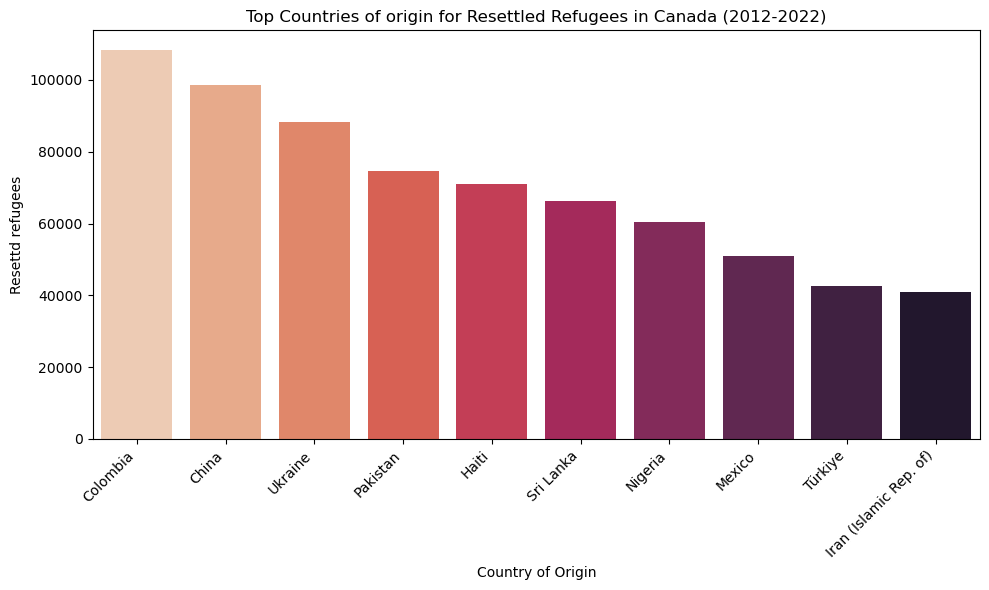

In [57]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_refugees, x='Country-of-origin', y='UNHCR-refugees', palette='rocket_r')

# Add labels and titles
plt.xlabel('Country of Origin')
plt.ylabel('Resettd refugees')
plt.title('Top Countries of origin for Resettled Refugees in Canada (2012-2022)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [41]:
refugees_by_year = data.groupby('Year')['UNHCR-refugees'].sum().reset_index(name='UNHCR-refugees').sort_values(by='Year',ascending=True).head(12)
refugees_by_year

,Year,UNHCR-refugees
0,2012,163751
1,2013,160347
2,2014,149164
3,2015,135890
4,2016,97322
5,2017,104768
6,2018,114101
7,2019,101757
8,2020,109214
9,2021,130125


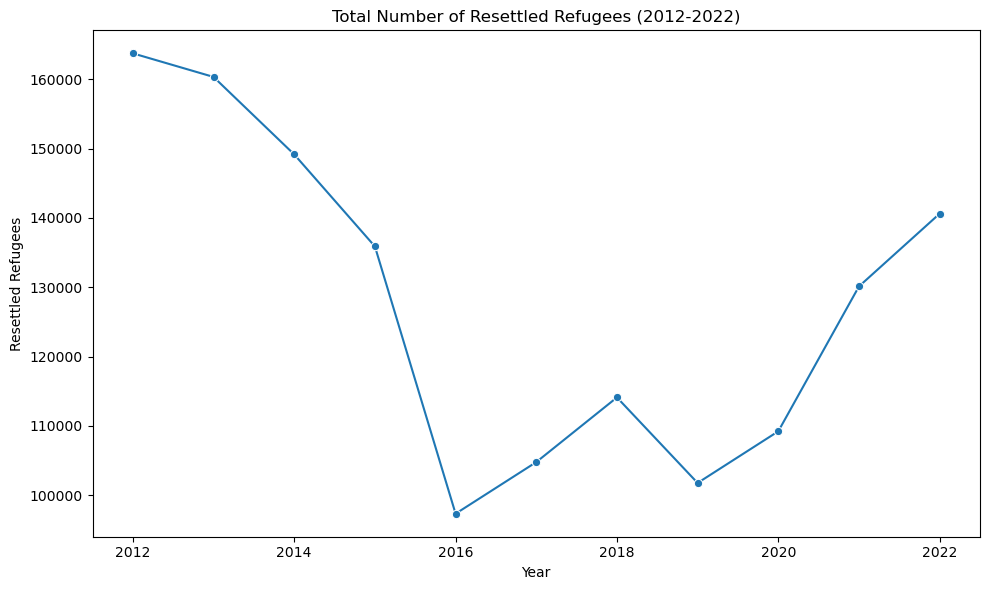

In [43]:
# Create a Seaborn line graph to visualize total number of resettled refugees in Canada per year
plt.figure(figsize=(10, 6))
sns.lineplot(data=refugees_by_year, x='Year', y='UNHCR-refugees', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Resettled Refugees')
plt.title('Total Number of Resettled Refugees (2012-2022)')

# Display plot
plt.tight_layout()
plt.show()

## What are the countries of origin for the majority of asylum claims made in Canada?

In [44]:
#group by the country of origins and sum the count of asylum seekers.
top_asylum_seekers = data.groupby('Country-of-origin')['Asylum-seekers'].sum().reset_index(name='Asylum-seekers').sort_values(by='Asylum-seekers', ascending=False).head(10)

# Display with the top countries for Asylum-seekers
top_asylum_seekers.reset_index(drop=True).style.bar()

,Country-of-origin,Asylum-seekers
0,Unknown,56098
1,Nigeria,51620
2,India,48806
3,Mexico,47146
4,Haiti,40908
5,Colombia,30475
6,China,21526
7,Pakistan,19023
8,Türkiye,18166
9,Iran (Islamic Rep. of),15011


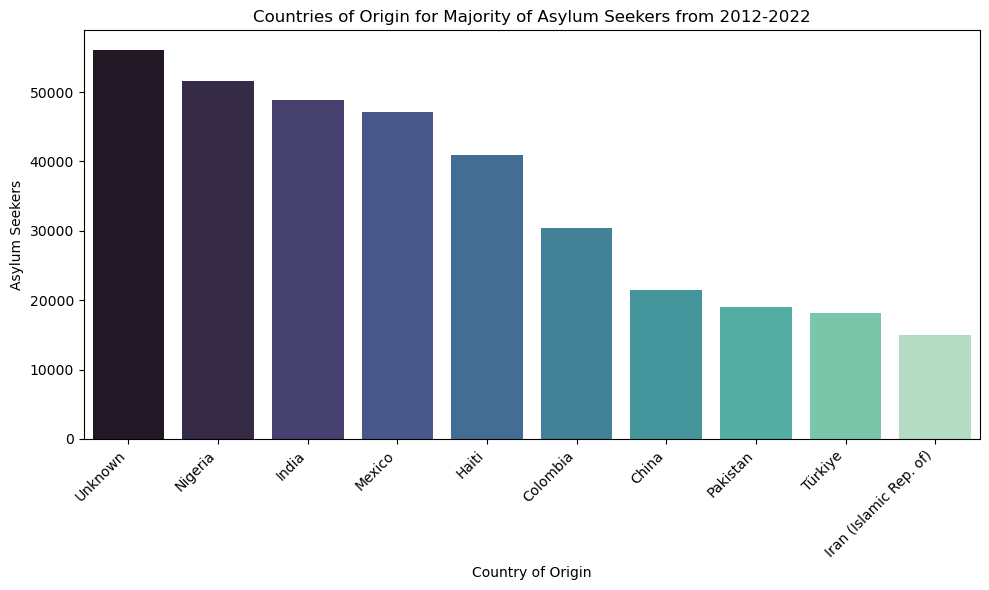

In [45]:
# Create Seaborn bar graph to visualize top 10 countries of origin for asylum seekers in Canada
plt.figure(figsize=(10,6))
sns.barplot(data=top_asylum_seekers, x='Country-of-origin', y='Asylum-seekers', palette='mako')

# Add labels and title
plt.xlabel('Country of Origin')
plt.ylabel('Asylum Seekers')
plt.title('Countries of Origin for Majority of Asylum Seekers from 2012-2022')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display plot
plt.tight_layout()
plt.show()

## Question 4: Total Number of Asylum Claims Made in Canada Every Year

In [46]:
#group by the country of origins and sum the count of asylum seekers.
top_asylum_seekers_yearly = data.groupby('Year')['Asylum-seekers'].sum().reset_index(name='Asylum-seekers').sort_values(by='Year', ascending=False).head(12)

# Display with the top countries for Asylum-seekers
top_asylum_seekers_yearly.reset_index(drop=True).style.bar()

,Year,Asylum-seekers
0,2022,113066
1,2021,63143
2,2020,85352
3,2019,97017
4,2018,78766
5,2017,51859
6,2016,23946
7,2015,19631
8,2014,16699
9,2013,22145


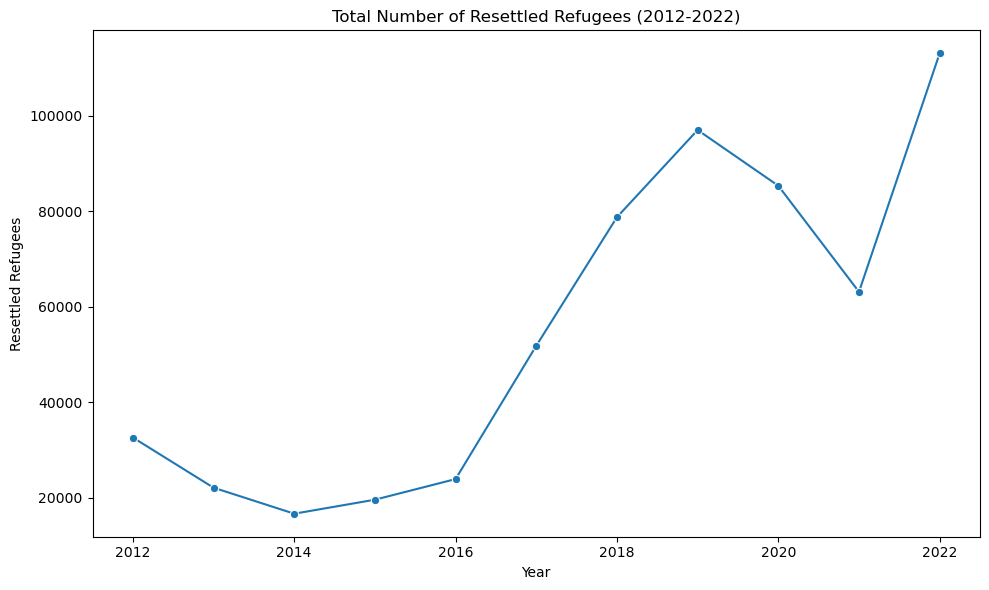

In [53]:
plt.figure(figsize=(10, 6))
sns.lineplot(data = top_asylum_seekers_yearly, x='Year', y='Asylum-seekers', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Resettled Refugees')
plt.title('Total Number of Resettled Refugees (2012-2022)')

# Display plot
plt.tight_layout()
plt.show()

## Question 5. What are the general trends in refugee and asylum statistics from 2012-2022?

In [55]:
# Countries with highest overall count
top_countries = data.groupby('Country-of-origin')['total-count'].sum().reset_index(name='total-count').sort_values(by ='total-count', ascending=False).head(10)

top_countries.reset_index(drop=True).style.bar()

,Country-of-origin,total-count
0,Colombia,138891
1,China,120112
2,Nigeria,112174
3,Haiti,111864
4,Mexico,98218
5,Pakistan,93760
6,Ukraine,91182
7,India,81757
8,Sri Lanka,75102
9,Unknown,72545


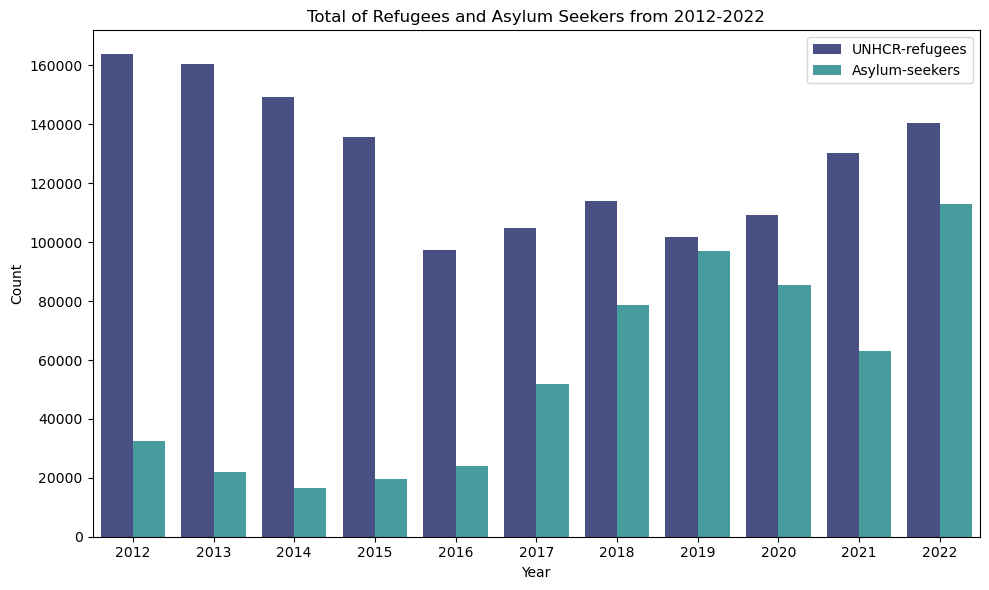

In [58]:
# General trends in number of refugees and asylum seekers
yearly_counts = data.groupby('Year')[['UNHCR-refugees', 'Asylum-seekers']].sum().reset_index()
melted_data = pd.melt(yearly_counts, id_vars=['Year'], var_name='Category', value_name='Count')

# Create a bar graph with unstacked, side-by-side bars using Matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='Year', y='Count', hue='Category', palette='mako')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Total of Refugees and Asylum Seekers from 2012-2022')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()